# Reproducing paper plots
This notebook runs the full analysis from script `main.py` and then plots the Figures included in our paper [Quantifying the structure of controversial discussions with unsupervised methods: a look into the Twitter climate change conversation](https://arxiv.org/abs/2206.14501)

In [1]:
# general libs
import networkx as nx
import os
from collections import Counter
from pathlib import Path
# plotting
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.dates import DateFormatter
from matplotlib import rc
from matplotlib import rcParams
from colour import Color
# local libs
os.chdir('../')
import src.paper.utils_and_plotting as up

# Run main script

In [2]:
# Run script that makes analysis
%run main.py

Read all libraries.
Read all edgelists. 0.05 minutes passed
Computed (persistent) leading users. 0.12 minutes passed
Computed all chambers, audiences, and their edgelists. 0.62 minutes passed
Computed overlap similarities. 2.1 minutes passed
Computed supervised and unsupervised communities. 2.1 minutes passed


/Users/blaskolic/Research/ResearchProjects/Climate Change Twitter Complexity/Twitter_chambers_new/src/polarization.py:45: RuntimeWarning: invalid value encountered in scalar divide
  return (in_strength - out_strength)/(in_strength + out_strength)


Computed polarization metrics. 2.12 minutes passed
Computed overlap metrics. 2.12 minutes passed
Computed chamber metrics. 2.12 minutes passed
Computed chamber network metrics. 2.6 minutes passed
Computed difference between network metrics and users' overlap. 2.69 minutes passed
Computed echo chambers and augmented echo chambers. 2.81 minutes passed
Computed auto-overlap metrics. 2.93 minutes passed
Computed null model overlaps. 4.67 minutes passed
Number of faulty weeks for LI: 11
Computed latent ideologies and model performance against ours. 6.01 minutes passed

RAN EVERYTHING SUCCESSFULLY!!! It took a total of 6.01 minutes.


# Prepare plot params

In [3]:
## PLOTTING STYLE AND FORMAT
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

rc('font', size=SMALL_SIZE)          # controls default text sizes
rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the figure title
scale = 1.2
figsize = (6.4*scale, 4.8*scale)
rcParams["figure.figsize"] =  figsize
# rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

## COLORS 
# Ideology colors
colors = up.ideology_colors()
colors_believers_skeptics = [colors[x] for x in ['believers','skeptics']]
colors_interaction = [colors[x] for x in ['believers','believers-skeptics','skeptics']]

# Appendix plot colors
ch_kw = { 'color':'purple', 'label':'chamber' }#, 'density':True}
au_kw = { 'color':'blue'  , 'label':'audience'}#, 'density':True}

In [4]:
save_plots = True
save_path = './figs_anonymized/'
os.makedirs(save_path, exist_ok=True)
save_path

'./figs_anonymized/'

In [5]:
# Note: File `usernames_to_index.pkl` isn't included in the Github repository for privacy reasons.
# DEANONYMIZE_USERS = True will result in an error
DEANONYMIZE_USERS = False
if DEANONYMIZE_USERS:
    # Read user to index dictionary
    user_to_index = pd.read_pickle('data/networks_anonymized/usernames/usernames_to_index.pkl')
    index_to_user = pd.Series( {ix:u for (u,ix) in user_to_index.items()} )
    
    print("Deanonymizing users...")
    leading_voices_dynamics.columns = leading_voices_dynamics.columns.astype('int').map(index_to_user)
    Q_static.index = Q_static.index.astype('int').map(index_to_user)
    Q_static.columns = Q_static.columns.astype('int').map(index_to_user)
    P_spectral = { index_to_user.loc[u]: c for (u,c) in P_spectral.items() }
    P_empirical = { index_to_user.loc[u]: c for (u,c) in P_empirical.items() }

    # Changing save folder
    save_path = './figs/'
    os.makedirs(save_path, exist_ok=True)
    print("Done!")

save_path

'./figs_anonymized/'

# Figure 1
Impact dynamics of the high-impact users

In [6]:
# Get color gradient for impact time series
n_believers = list(P_empirical.values()).count('believers')
n_skeptics = list(P_empirical.values()).count('skeptics')
n_other = list(P_empirical.values()).count('other')

# reds
color_antis = list( Color('#B00C0C').range_to( Color('#E7B95C') , n_skeptics ) )
color_antis = [color.get_rgb() for color in color_antis]
# greens
color_pros = list( Color('#2F9506').range_to( Color('#58DF83') , n_believers ) )
color_pros = [color.get_rgb() for color in color_pros]
# greys
color_other = list( Color('#E3E3E2').range_to( Color('#4E4E4E') , n_other ) )
color_other = [color.get_rgb() for color in color_other]
# color gradient
color_gradient = color_pros + color_other + color_antis

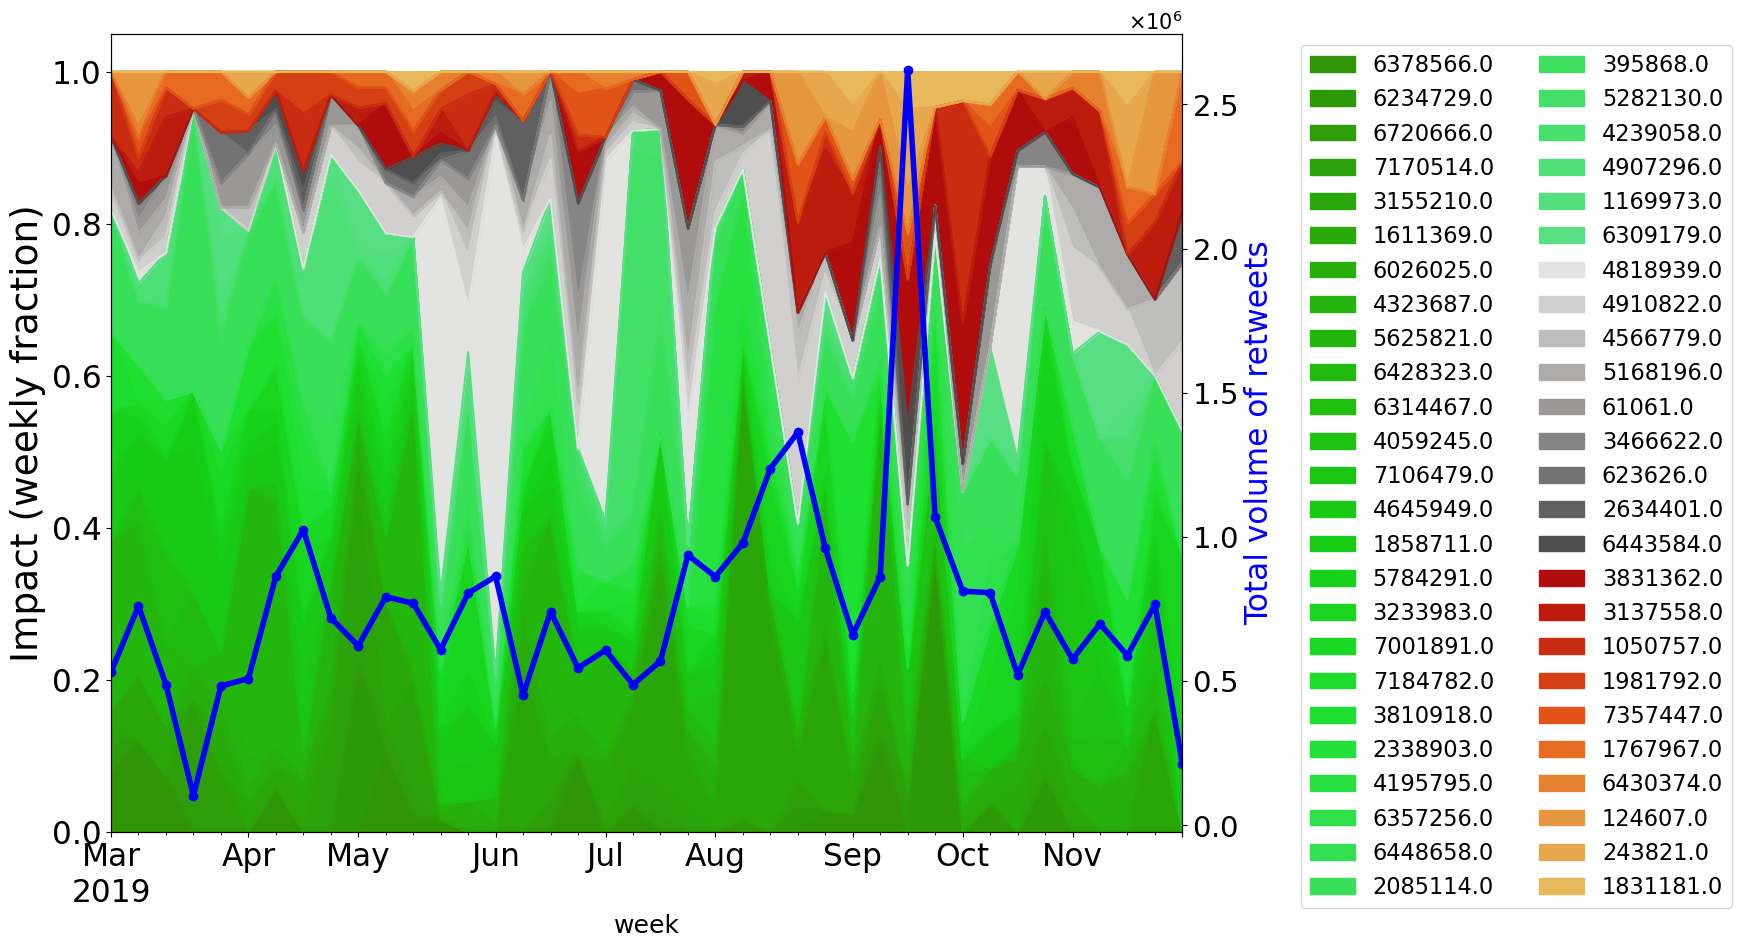

In [7]:
# Normalize leading user impacts and re-order according to ideology
leading_voices_dynamics_norm = leading_voices_dynamics.div(leading_voices_dynamics.sum(axis=1), axis=0)
leading_voices_dynamics_norm = leading_voices_dynamics_norm[P_empirical.keys()]

# Plot normalized series
ax = leading_voices_dynamics_norm.plot(
    kind='area', figsize=[1.8*f for f in figsize], legend=True, color=color_gradient
)
plt.xticks(fontsize=SMALL_SIZE*1.5)
plt.yticks(fontsize=SMALL_SIZE*1.5)
plt.ylabel('Impact (weekly fraction)', fontsize=MEDIUM_SIZE*1.5)
plt.xlabel('')

# Plot volume of retweets
num_rts_weekly.plot(secondary_y=True, lw=4, marker='o', color="blue" )
plt.ylabel( 'Total volume of retweets', color="blue", fontsize=SMALL_SIZE*1.5 )
plt.yticks(fontsize=SMALL_SIZE*1.4)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
lgd = ax.legend(ncol=2,bbox_to_anchor=(1.1, 1), fontsize=SMALL_SIZE*1.08)

if save_path:
    plt.savefig(save_path+'impact_dynamics_persistent.png', dpi=160, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Figure 2
Schematic diagram of the audience and the chamber

In [8]:
# Made on power point

# Figure 3
Aggregate chamber overlap distributions for the empirical and configuration model networks.

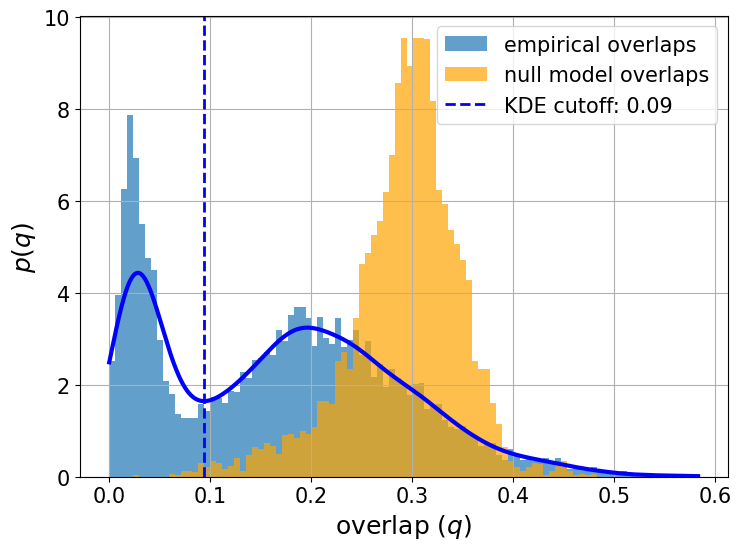

In [9]:
# Get similarity distribution
q = sm.flatten_similarity_matrix( Q_static )
q_agg = sm.flatten_similarity_matrices( Q_dynamic )
qC, fKDE = ut.get_pdf_cutoff( q_agg, return_kde_dist=True )
q_null = sm.flatten_similarity_matrices( Q_config_model )
# q_null = null_overlaps['chambers'].dropna().values

# Plot histograms
bins = np.linspace(0, max( max(q_null), max(q_agg)), 100)
plt.hist(q_agg, bins, density=True, alpha=0.7, label='empirical overlaps')
plt.hist(q_null, bins, density=True, alpha=0.7, color='orange', label="null model overlaps")

plt.plot(q_agg, fKDE, lw=3, c='blue', label='' )
plt.axvline( qC, lw=2, c='blue', ls='--', label='KDE cutoff: {}'.format( np.round(qC,2) ) )

plt.xlabel('overlap $(q)$')
plt.ylabel('$p(q)$')
plt.legend()
plt.grid('on');

if save_plots:
    plt.tight_layout()
    plt.savefig(save_path+'overlap_distribution.png', dpi=220)

# Figure 4
Aggregate chamber overlaps between the leading users.

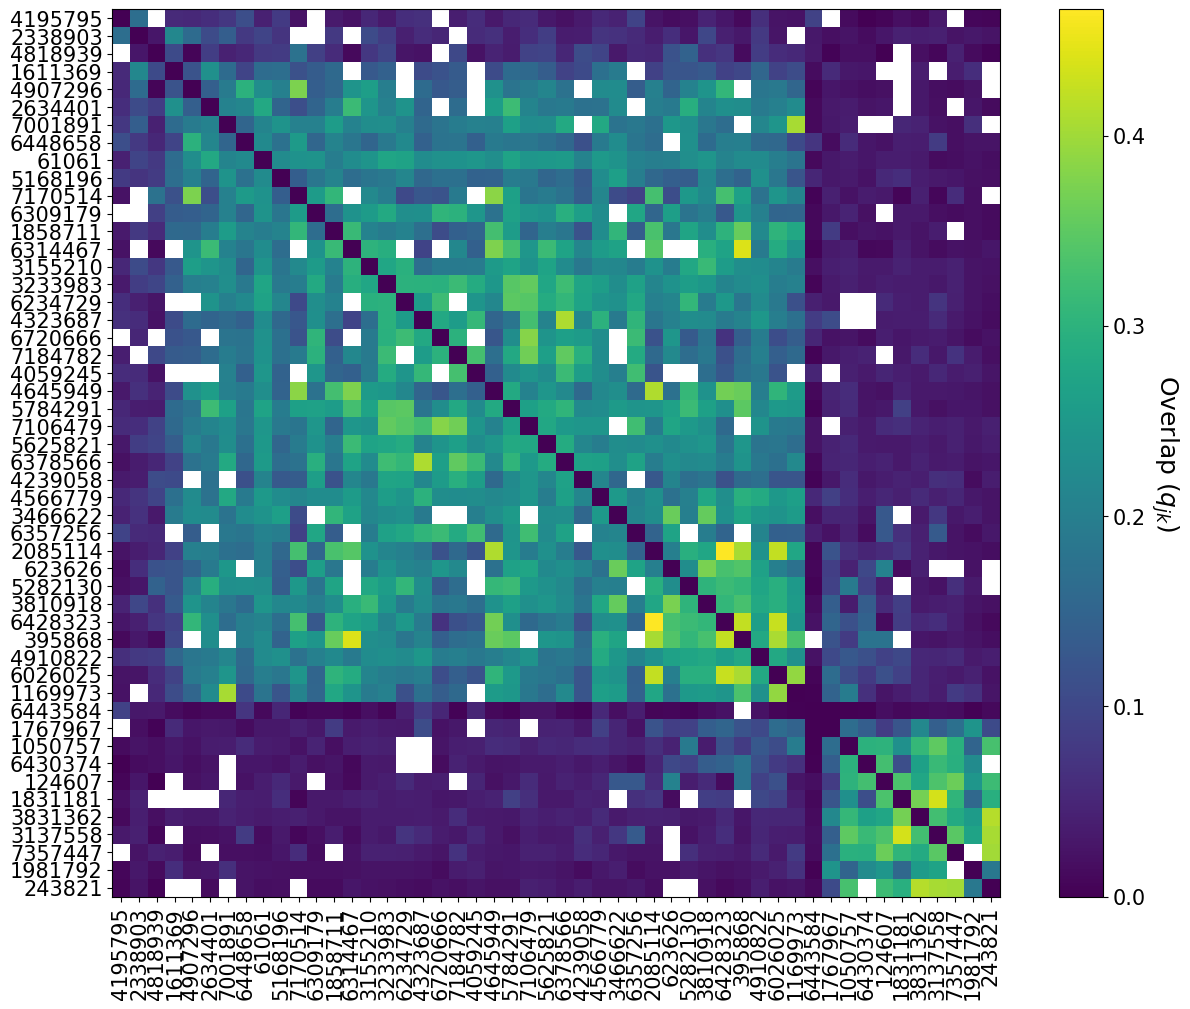

In [10]:
Q_spectral = sm.reorder_similarity_matrix(Q_static, P_spectral)
Q_empirical = sm.reorder_similarity_matrix(Q_static, P_empirical)

s = tuple(np.array(rcParams['figure.figsize'] ) * 2.0)
plt.figure( figsize=s )

# plt.subplot(221)
plt.imshow(Q_spectral)
plt.xticks( range(len(Q_spectral)), Q_spectral.index, rotation=90);
plt.yticks( range(len(Q_spectral)), Q_spectral.index );
cbar = plt.colorbar()
cbar.set_label('Overlap ($q_{jk}$)', rotation=270, labelpad=25)

# plt.subplot(222)
# plt.imshow(Q_empirical)
# plt.xticks( range(len(Q_empirical)), Q_empirical.index, rotation=90, fontsize=12 );
# plt.yticks( range(len(Q_empirical)), Q_empirical.index, fontsize=12 );
# plt.colorbar()

# plt.tight_layout()

if save_plots:
    plt.savefig(save_path+'similarity_matrix.png', dpi=160)

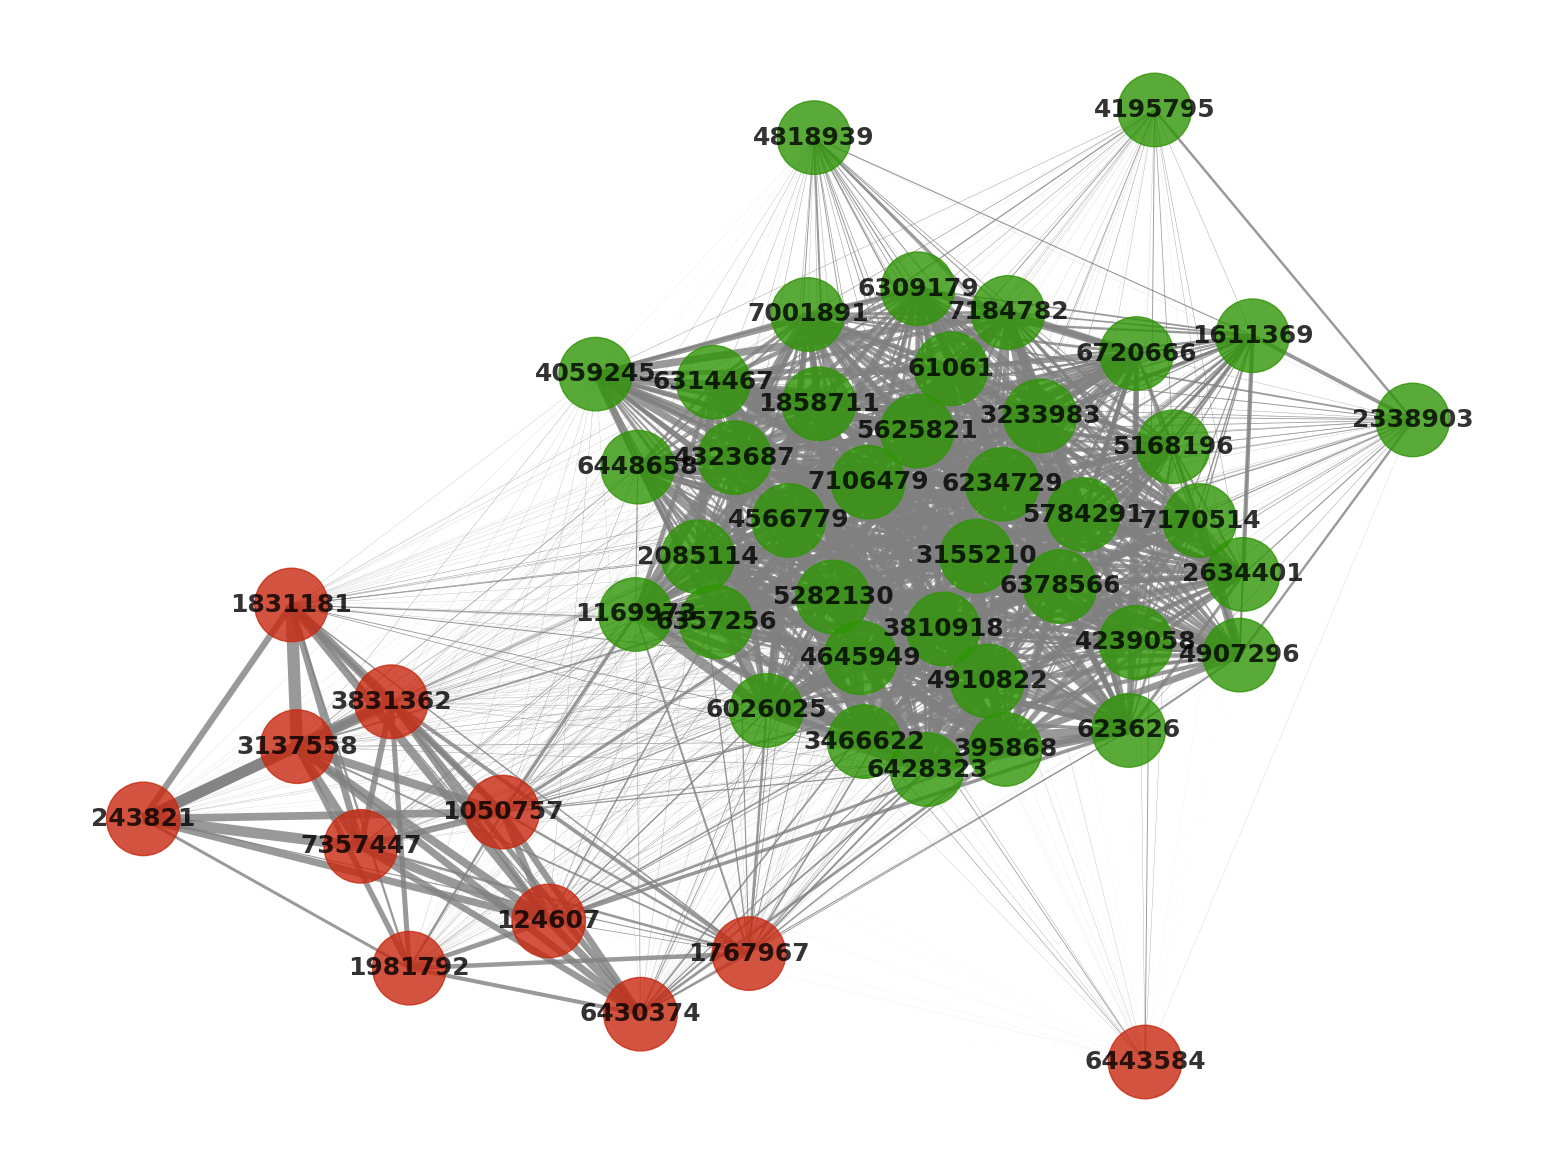

In [11]:
### PLOT SIMILARITY NETWORK BY COMMUNITY 
sim_G = ut.network_from_similarity( sm.reorder_similarity_matrix(Q_static, P_spectral).replace(np.nan,0) )

weights = np.array( [sim_G.get_edge_data(u,v)['weight'] for u,v in sim_G.edges] )
# C_dict = { 'believers':g, 'skeptics':r, 'other':w }
C_dict = dict( zip( set(P_spectral.values()), [colors[x] for x in ['skeptics','believers']] ) )
node_colors = [C_dict[c] for c in P_spectral.values()]

pos = nx.spring_layout(sim_G, k=3/np.sqrt(len(sim_G)), seed=0)

plt.figure( figsize = s )
nx.draw( sim_G, pos=pos, with_labels=True, alpha=0.8, node_size=2800, node_color=node_colors,
         font_size=18, font_weight='bold', edge_color='gray', width=(weights)**(5/3)*35 )

if save_plots:
    plt.savefig(save_path+'similarity_network.png', dpi=120)

# Figure 5
Polarization dynamics

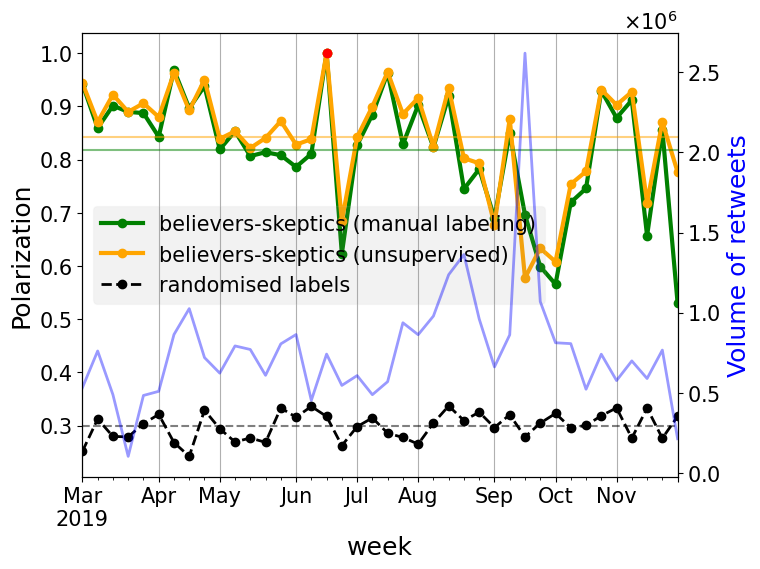

In [12]:
# Plot polarization time series
ax = polarization_dynamic_empirical.plot(lw = 3, c='green', marker='o', mfc=None, label='believers-skeptics (manual labeling)', )
polarization_dynamic_spectral.plot(lw = 3, c='orange', marker='o', mfc=None, label='believers-skeptics (unsupervised)', )
polarization_dynamic_shuffled_mean.plot(lw = 2, marker='o', ls='--', c='black', label='randomised labels' )

# Indicate weeks where there are only believers
consensus_weeks = polarization_dynamic_empirical[ polarization_dynamic_empirical == 1 ].index
consensus_weeks = pd.Series( [1]*len(consensus_weeks), index=consensus_weeks )
consensus_weeks.plot(marker='o', lw=0, c='red', label='')

# Plot retweet volume timeseries
ax2 = pd.Series( ( num_rts_weekly ) , index=network_dates).plot(secondary_y=True, ax=ax, lw=2, c='blue', alpha=0.4)#, label='total retweets')

# Plot mean polarization lines
ax.axhline( polarization_dynamic_empirical.mean(), c='green', alpha=0.5 )
ax.axhline( polarization_dynamic_spectral.mean(), c='orange', alpha=0.5 )
ax.axhline( polarization_dynamic_shuffled_mean.mean(), c='black', alpha=0.5, ls='--' )

ax.grid('on', axis='x')
ax.legend(facecolor='grey', framealpha=0.1)#, loc='center left');
ax.set_ylabel('Polarization')
ax2.set_ylabel('Volume of retweets', c='blue')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
ax2.grid(False)

if save_plots:
    plt.savefig(save_path+'polarization_dynamics.png', dpi=220)

# Figure 6 
Schematic of an echo chamber and an augmented echo chamber

In [13]:
# Made on power point

# Figure 7
Ideology scores distribution

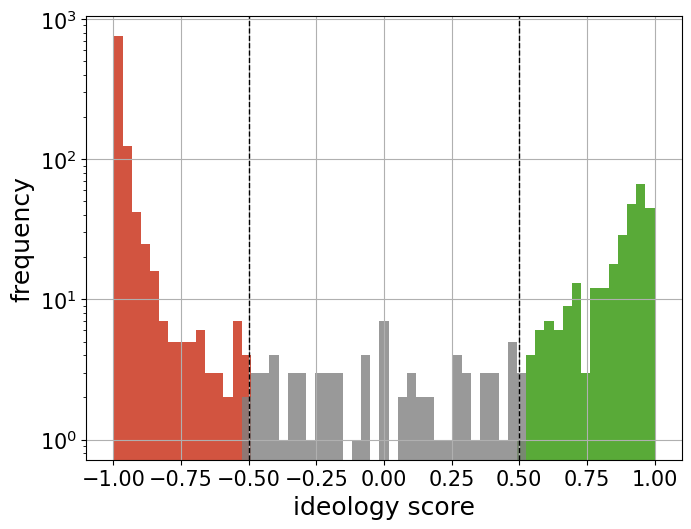

In [14]:
# Plot high-impact score histogram
bins = np.linspace(-1,1, 60)
plt.hist( high_impact_scores_skeptics, bins, density=False, alpha=0.8, color=colors['skeptics'] );
plt.hist( high_impact_scores_believers, bins, density=False, alpha=0.8, color=colors['believers'] );
plt.hist( high_impact_scores_neutral, bins, density=False, alpha=0.8, color='gray' );

# Indicate decision lines
plt.axvline(-IDEOLOGY_THRESH, lw=1, ls='--', label='', color='black')
plt.axvline(IDEOLOGY_THRESH, lw=1, ls='--', label='', color='black')

plt.xlabel('ideology score')
plt.ylabel('frequency')
plt.yscale('log')
plt.grid()

if save_plots:
    plt.savefig(save_path+'/echo_chambers_high_impact_scores.png', dpi=220)

# Figure 8
Size of the augmented echo chambers

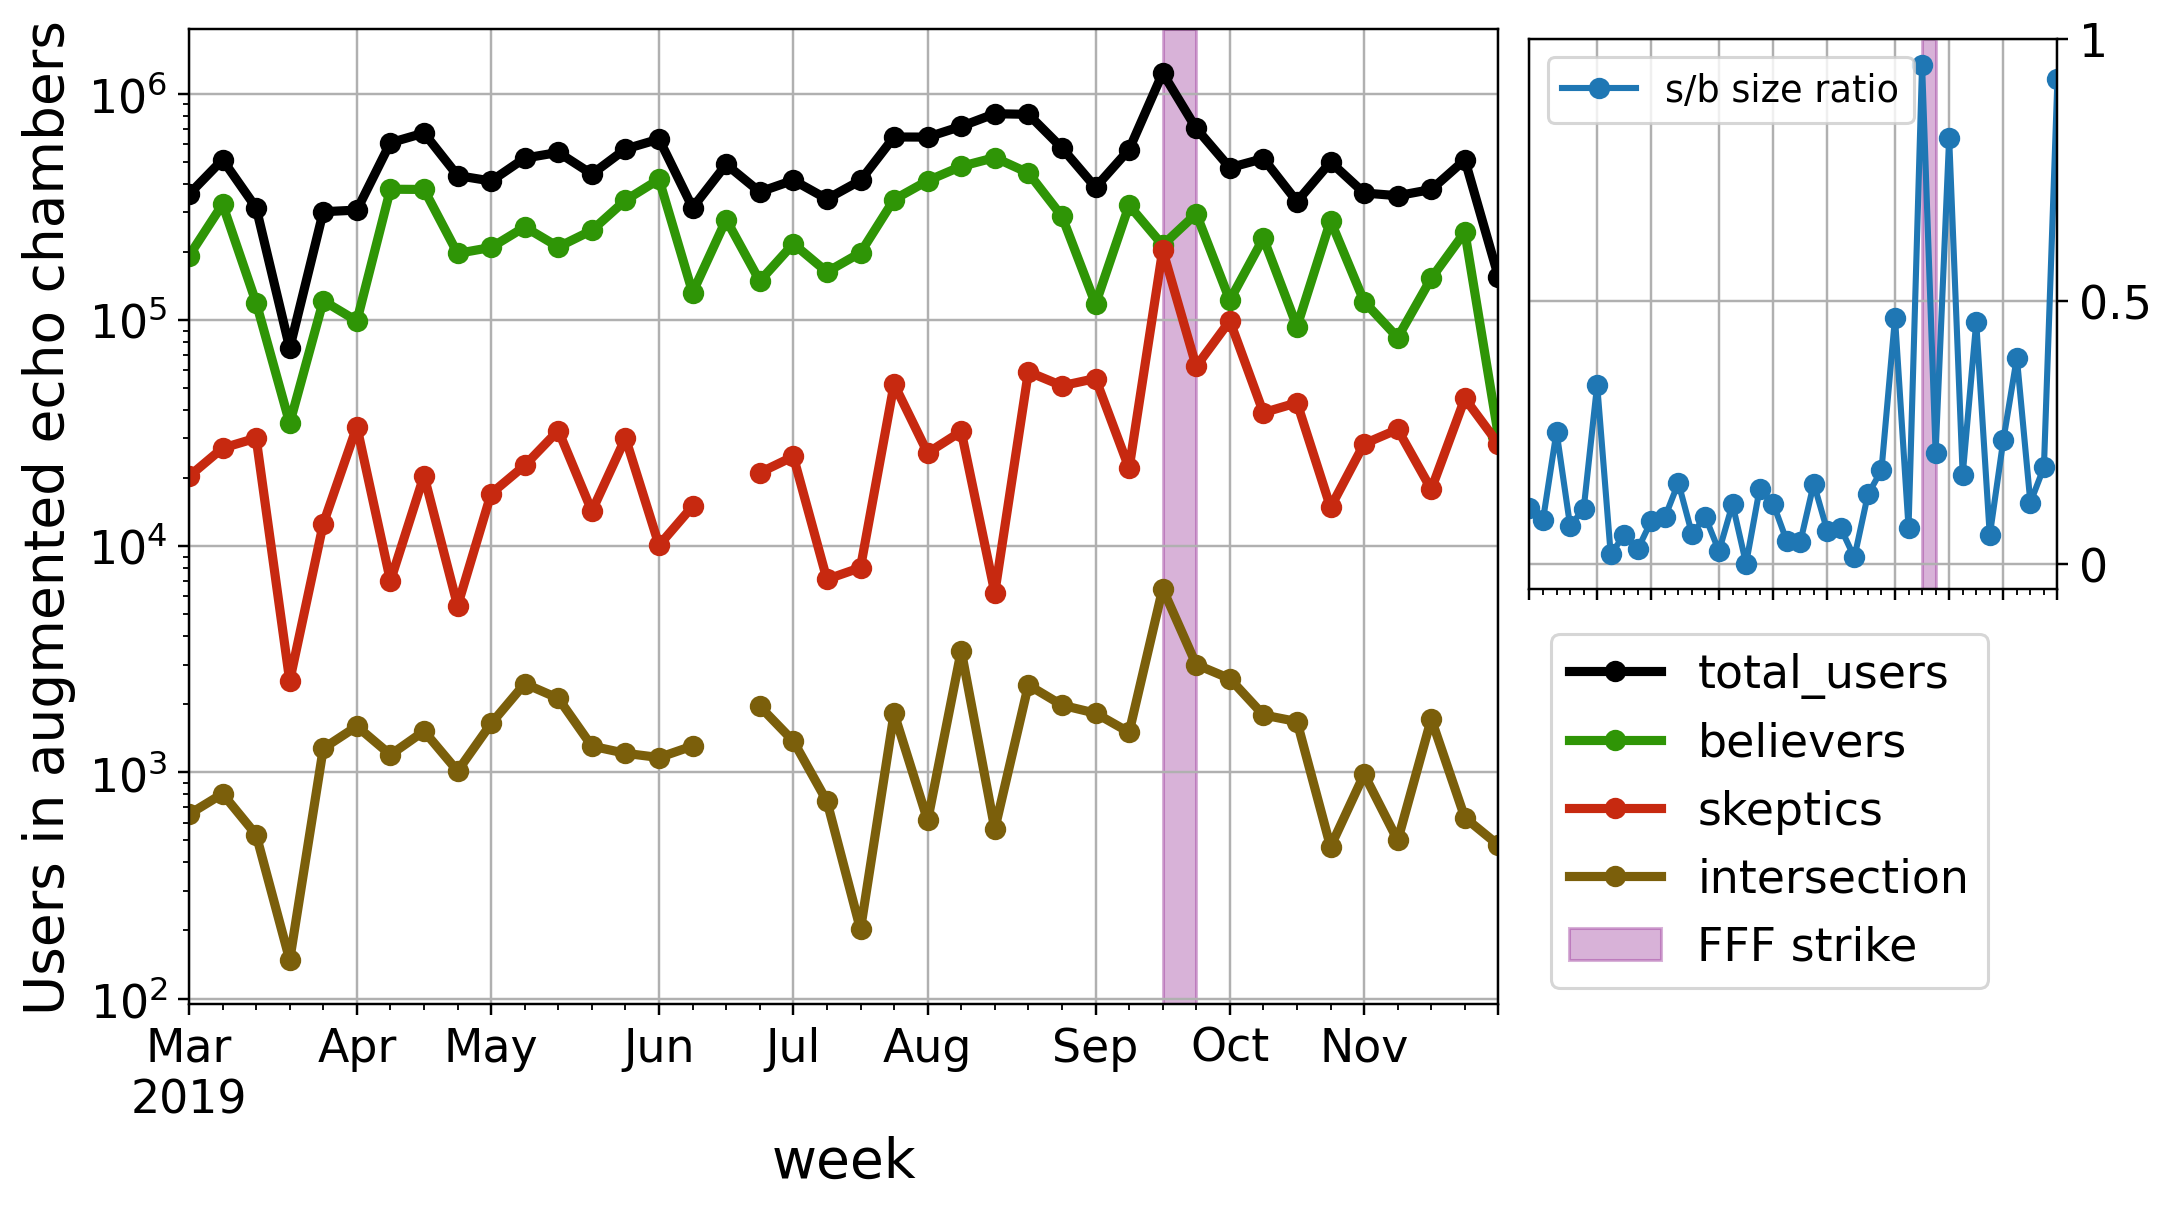

In [15]:
## NOTE: labels are inverted
f, ax = plt.subplots(dpi=220)

# Plot augmented echo chamber sizes over time
num_users_weekly.plot(lw=3, label='total_users', color='black', marker='o', ax=ax)
size_augmented_echo_chambers_believers.plot(lw=3, label='believers', color=colors['believers'], marker='o', ax=ax)
size_augmented_echo_chambers_skeptics.replace(0, np.nan).plot(lw=3, label='skeptics', color=colors['skeptics'], marker='o', ax=ax)
size_augmented_echo_chambers_intersection.replace(0, np.nan).plot(lw=3, label='intersection', color=colors['believers-skeptics'], marker='o', ax=ax)
# Plot strike dates
FFFstrike = (up.strike_dates()[0][-2:-1],)
up.plot_strike_dates( dates=FFFstrike, colors=['purple'], alpha=0.3, label='FFF strike' )
# Plot params
plt.legend(bbox_to_anchor=(1.04,0.38), borderaxespad=0)
plt.grid()
plt.xlabel('week')
plt.ylabel('Users in augmented echo chambers')
plt.yscale('log')

## Plot inset: skeptics/believers size ratio
axins = inset_axes(ax, width=2.4, height=2.5, bbox_to_anchor=(685*2.2*1.38,364*2.2*1.38), borderpad=0 )
axins.tick_params( labelleft=True, labelbottom=False ) 
sb_size_ratio = size_augmented_echo_chambers_skeptics/size_augmented_echo_chambers_believers
sb_size_ratio.plot( lw=2, marker='o', label='s/b size ratio', ax=axins )
# Plot strikes on inset
FFFstrike = (up.strike_dates()[0][-2:-1],)
up.plot_strike_dates( dates=FFFstrike, colors=['purple'], alpha=0.3, ax=axins, label='' )
# Inset params
axins.legend(fontsize=12, loc='upper left')
axins.set_yticks([0,0.5,1], [0,0.5,1], fontsize=15)
axins.yaxis.tick_right()
axins.set_xlabel('')
axins.grid('on');

if save_plots:
    plt.savefig(save_path+'/echo_chambers_sizes_inset_ratio_s-b.png',  bbox_inches='tight')

# Figure 9
Auto-overlap similarity decay for each augmented echo chamber

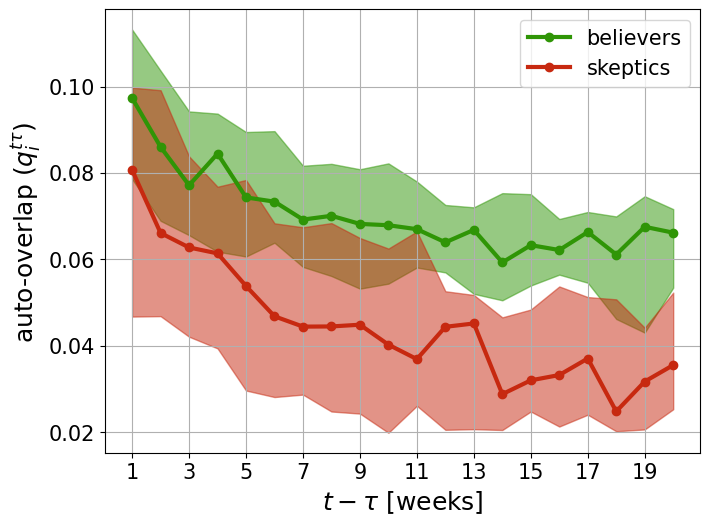

In [16]:
## PLOTTING 
cols = ['overlap','delta_t','ideology']
_df = up.ideology_grouping( autooverlaps_echo_chambers[ cols ], y_col='overlap', time_col='delta_t' )
up.ideology_lineplot( _df, colors=colors_believers_skeptics, lw=3, marker='o' )

# plt.ylabel('auto-overlap')
# plt.ylabel('$ q_{i}^{t \\tau} $')
plt.ylabel('auto-overlap ($ q_{i}^{t \\tau} $)')
plt.xlabel( '$ t - \\tau $ [weeks]')
plt.xticks(range(1,20)[::2])
plt.legend()

plt.grid('on')

if save_plots:
    plt.savefig(save_path+'/echo_chambers_auto-overlap_decay.png', dpi=220)

# Appendix Figure 10
Augmented echo chambers (AEC) vs Latent Ideology Inference (LII) classification

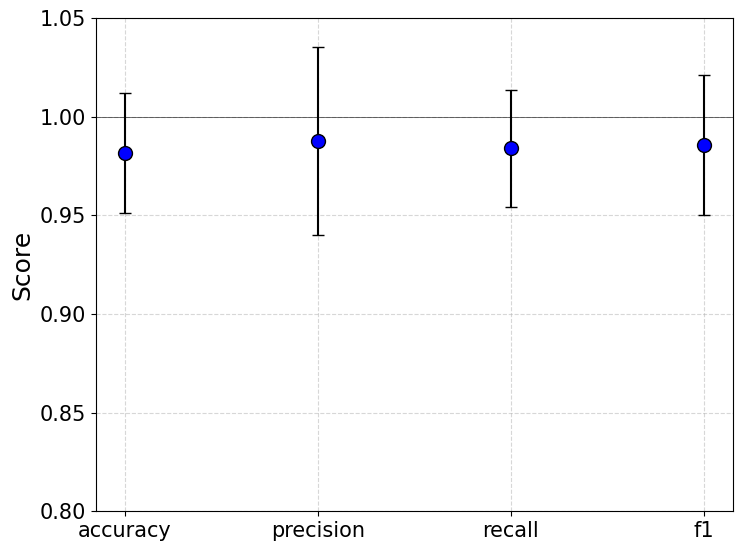

In [17]:
C = ['accuracy','precision','recall','f1']
μ = performance_against_LI[C].mean()
σ = performance_against_LI[C].std()
plt.errorbar(
    C, μ, yerr=2*σ,
    fmt='o',              # marker only (no line)
    markersize=10,        # big marker
    capsize=4,            # caps on errorbars
    elinewidth=1.5,       # error bar thickness
    ecolor='black',       # error bar color
    markerfacecolor='blue',  # marker fill
    markeredgecolor='black'
)
plt.axhline(1, color='black', lw=0.4, ls='-')

plt.ylabel('Score')
# plt.title('Chamber classification (ours) vs Latent ideologies (Falkenberg, 2022)')
# plt.title('CM against LI performance across weeks')
plt.grid(True, linestyle='--', alpha=0.5)
# plt.ylim(0.9, 1.02)
plt.ylim(0.8, 1.05)
plt.tight_layout();

if save_plots:
    plt.savefig(save_path+'cm_against_li_performance.png', dpi=220)

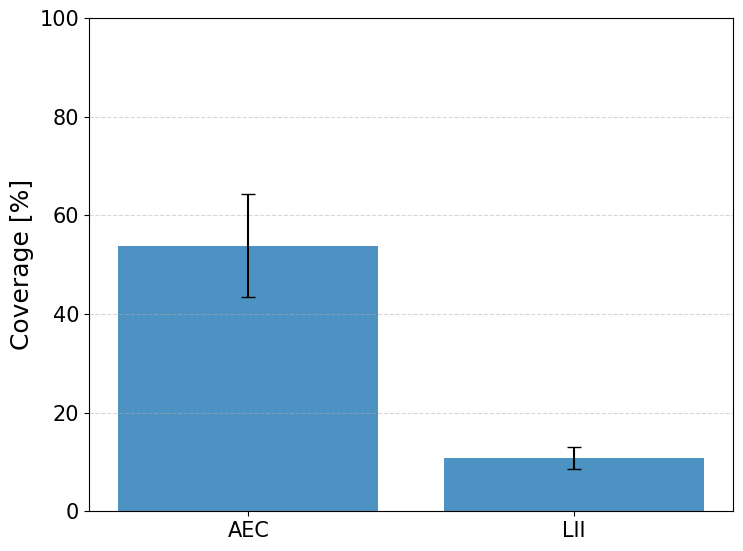

In [18]:
C = ['p_classified_ACS', 'p_classified_LI']
# ticks = ['chamber similarity (CS)', 'latent ideologies (LI)']
ticks = ['AEC', 'LII']
μ = performance_against_LI[C].mean() * 100
σ = performance_against_LI[C].std() * 100
    
# plt.figure(figsize=(8, 5))
plt.bar(ticks, μ, yerr=σ, capsize=5, alpha=0.8)
plt.ylabel("Coverage [%]")
# plt.title("Population coverage across weeks")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout();

if save_plots:
    plt.savefig(save_path+'cm_against_li_coverage.png', dpi=220)

# Appendix Figure 11
Eigenvector associated with λ3, the third leading eigenvalue, sorted
by magnitude

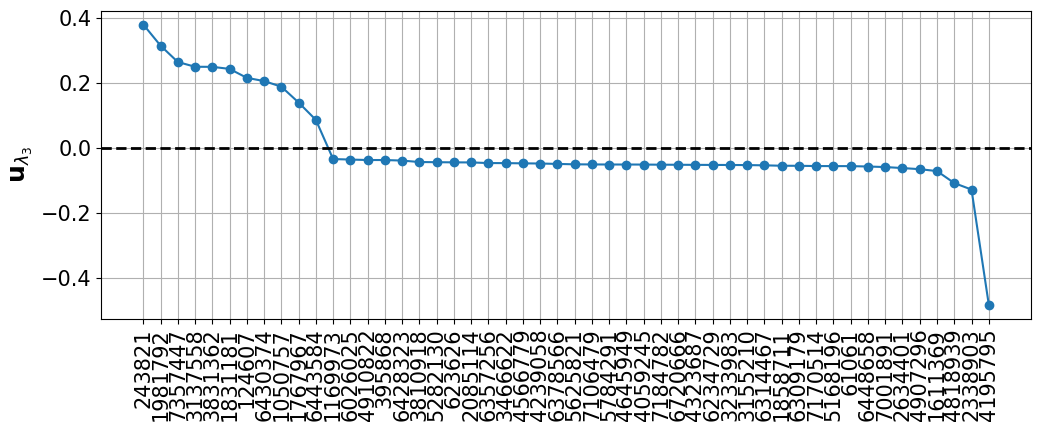

In [19]:
plt.figure( figsize=(12,4) )

eigvec = spectral_eigvecs[:,2]
users_clustering = np.argsort( -eigvec )

plt.plot(eigvec[users_clustering], marker='o')
plt.axhline(0, c='black', lw=2, ls='--')

xtk = plt.xticks( range(len(Q_static.index))[::1], Q_static.index[users_clustering][::1], rotation=90)#, fontsize=14 )
plt.ylabel('$\mathbf{u}_{\\lambda_3}$')#, fontsize=22)
plt.grid('on');

if save_plots:
    plt.savefig(save_path+'leading_eigenvector_laplacian.png', dpi=220, bbox_inches = "tight")

# Appendix Figure 12
Chamber and audience sizes

In [20]:
# helper
def get_cmf(array):
    counts = Counter(array)
    total = sum(counts.values())
    pmf = {k: v / total for k, v in counts.items()}
    
    # Sort and compute CMF
    x = np.array(sorted(pmf.keys()))
    y = np.cumsum([pmf[k] for k in x])
    return (x,y)

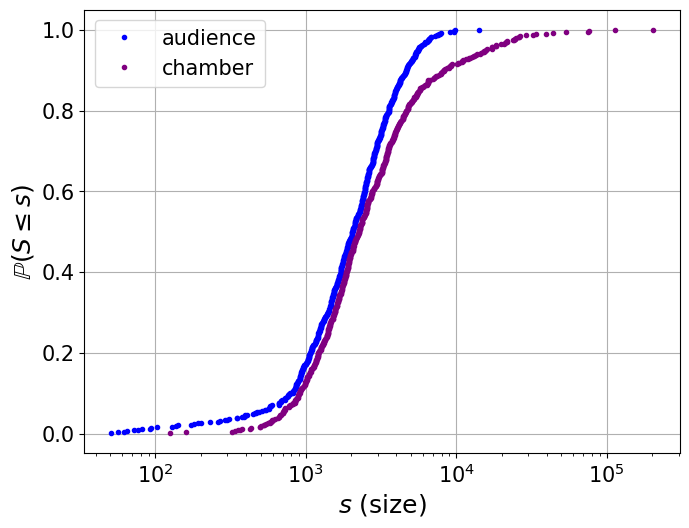

In [21]:
# Get cumulative mass functions
cmf_chambers  = get_cmf(chamber_sizes_dynamic['chamber_size'].values)
cmf_audiences = get_cmf(audience_sizes_dynamic['audience_size'].values)

# plot CMFs
plt.plot(*cmf_chambers, marker='o', markersize=3, lw=0, **au_kw)
plt.plot(*cmf_audiences, marker='o', markersize=3, lw=0, **ch_kw)
plt.xscale('log')
plt.ylabel('$\mathbb{P}(S \leq s)$')
plt.xlabel('$s$ (size)')
plt.grid()
plt.legend( )

if save_plots:
    plt.savefig(save_path+'audience-chamber_size_CDF.png', dpi=220)

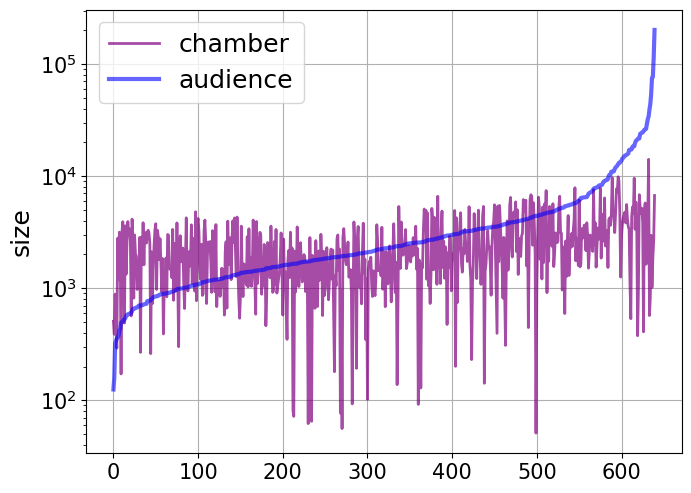

In [22]:
# Plot audience and chamber sizes sorted by audience sizes
ix = np.argsort( audience_sizes_dynamic['audience_size'] )
plt.plot( chamber_sizes_dynamic['chamber_size'].iloc[ix].values, lw=2, alpha=0.7, **ch_kw ) 
plt.plot( audience_sizes_dynamic['audience_size'].iloc[ix].values, lw=3, alpha=0.6, **au_kw ) 
plt.legend(fontsize=18)
plt.yscale('log')
plt.grid('on')
plt.ylabel("size")

if save_plots:
    plt.savefig(save_path+'audience-chamber_size_correlation.png', dpi=220)

# Appendix Figure 13
Aggregate chamber and subchamber overlap distributions

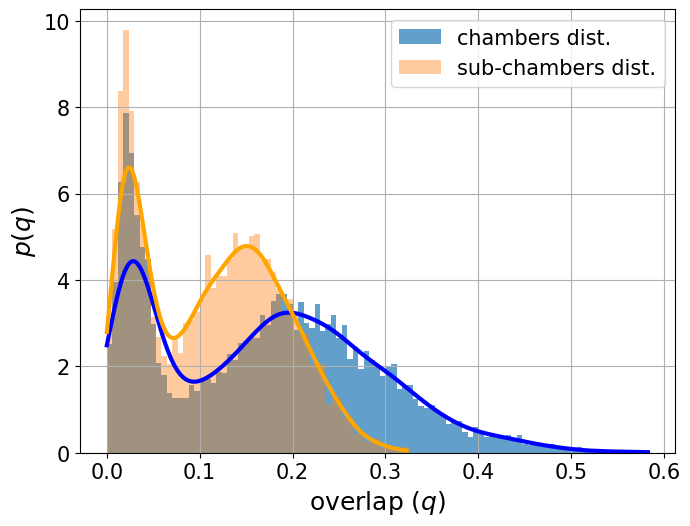

In [23]:
# Get vanilla similarity distributions
q_agg = sm.flatten_similarity_matrices( Q_dynamic )
qC, fKDE = ut.get_pdf_cutoff( q_agg, return_kde_dist=True )
# Get similarity distributions when removing common audience members
qsub_agg = sm.flatten_similarity_matrices( Q_subchambers_dynamic )
qCsub, fKDEsub = ut.get_pdf_cutoff( qsub_agg, return_kde_dist=True )

# Plot histograms
bins = np.linspace(0, max( max(q_null), max(q_agg)), 100)
plt.hist(q_agg, bins, density=True, alpha=0.7, label='chambers dist.')
plt.hist(qsub_agg, bins, density=True, alpha=0.4, label="sub-chambers dist.")
# Plot KDE lines
plt.plot(q_agg, fKDE, lw=3, c='blue', label='' )
plt.plot( qsub_agg, fKDEsub, lw=3, c='orange', label='' )
# plt.axvline( qC, lw=2, c='blue', ls='--', label='KDE cutoff: {}'.format( np.round(qC,2) ) )
# plt.axvline( qCsub, lw=2, c='orange', ls='--', label='KDE cutoff: {}'.format( np.round(qCsub,2) ) )

plt.xlabel('overlap $(q)$')
plt.ylabel('$p(q)$')
plt.legend()
plt.grid('on');

if save_plots:
    plt.savefig(save_path+'chamber-subchamber_overlap_distribution.png', dpi=220)

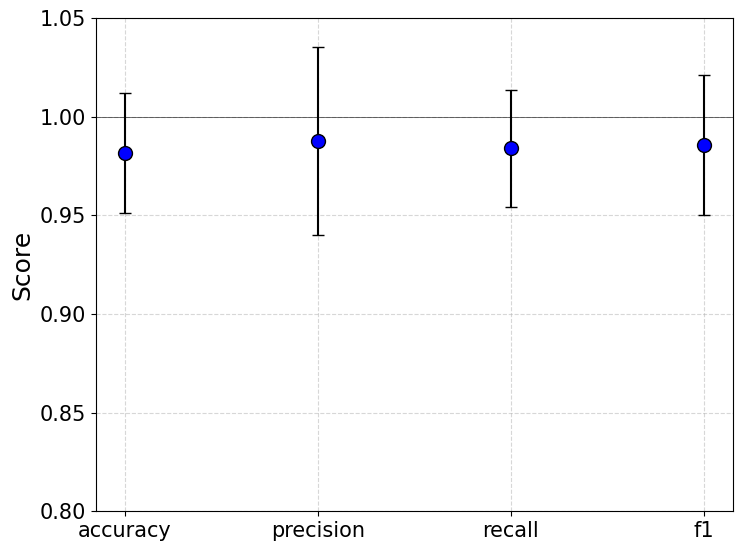

In [31]:
C = ['accuracy','precision','recall','f1']
μ = performance_against_LI[C].mean()
σ = performance_against_LI[C].std()
plt.errorbar(
    C, μ, yerr=2*σ,
    fmt='o',              # marker only (no line)
    markersize=10,        # big marker
    capsize=4,            # caps on errorbars
    elinewidth=1.5,       # error bar thickness
    ecolor='black',       # error bar color
    markerfacecolor='blue',  # marker fill
    markeredgecolor='black'
)
plt.axhline(1, color='black', lw=0.4, ls='-')

plt.ylabel('Score')
# plt.title('Chamber classification (ours) vs Latent ideologies (Falkenberg, 2022)')
# plt.title('CM against LI performance across weeks')
plt.grid(True, linestyle='--', alpha=0.5)
# plt.ylim(0.9, 1.02)
plt.ylim(0.8, 1.05)
plt.tight_layout();

if save_plots:
    plt.savefig(save_path+'cm_against_li_performance.png', dpi=220)

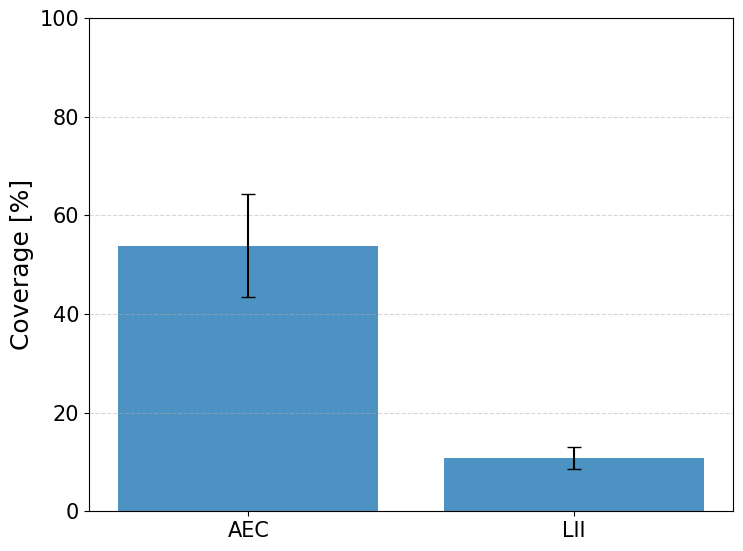

In [39]:
C = ['p_classified_ACS', 'p_classified_LI']
# ticks = ['chamber similarity (CS)', 'latent ideologies (LI)']
ticks = ['AEC', 'LII']
μ = performance_against_LI[C].mean() * 100
σ = performance_against_LI[C].std() * 100
    
# plt.figure(figsize=(8, 5))
plt.bar(ticks, μ, yerr=σ, capsize=5, alpha=0.8)
plt.ylabel("Coverage [%]")
# plt.title("Population coverage across weeks")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout();

if save_plots:
    plt.savefig(save_path+'cm_against_li_coverage.png', dpi=220)